In [52]:
### Repeat call def
import pandas as pd
from config import api_key_av
import requests

# USER INPUTS TOOLS
tickers = ['FB' ,'AMZN', 'AAPL', 'NFLX', 'GOOG']
interval = '1min'

try:
    len(master_df)
except:
#     return 
    print('Error initalizing data model')

cur_ds = []

# function for data call
for ticker in tickers:
    try: 
        params = {
            'function' : 'TIME_SERIES_INTRADAY',
            'symbol' : ticker,
            'interval': interval,
            'outputsize' : 'compact',
            'datatype' : 'json',
            'apikey' : api_key_av
        }

        url = 'https://www.alphavantage.co/query?'

        response = requests.get(url, params).json()
        
        
        
        cur_item = response['Time Series (1min)'][cur_time]
        cur_close = float(response['Time Series (1min)'][next(iter(response['Time Series (1min)']))]['4. close'])
        cur_volume = float(response['Time Series (1min)'][next(iter(response['Time Series (1min)']))]['5. volume'])
        
    except:
        cur_close = ''
        cur_volume = ''
        
    cur_ds.append(cur_close)
    cur_ds.append(cur_volume)


cur_time = [next(iter(response['Time Series (1min)']))][0]
master_df.loc[cur_time] = cur_ds

ValueError: cannot set a row with mismatched columns

In [53]:
master_df

,time,FB_price,FB_volume,AMZN_price,AMZN_volume,AAPL_price,AAPL_volume,NFLX_price,NFLX_volume,GOOG_price,GOOG_volume
0,2020-02-20 15:55:00,214.5900,110939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-20 15:54:00,214.3600,111041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-20 15:53:00,214.0800,71372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-20 15:52:00,214.1600,110104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-20 15:51:00,214.3350,63445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1934,2020-02-13 09:35:00,210.2400,71580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1935,2020-02-13 09:34:00,210.2800,78996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936,2020-02-13 09:33:00,209.8134,81256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1937,2020-02-13 09:32:00,209.9500,54933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# import dependencies
import pandas as pd
from config import api_key_av
import requests


### Initalizing Dataset for Pre-run Analysis ###
def ds_init(tickers = ['FB' ,'AMZN', 'AAPL', 'NFLX', 'GOOG'], interval = '1min'):

    master_df = pd.DataFrame()

    # Loop through each ticker
    for ticker in tickers:
        
        # init of parsed data objects
        time_parse = []
        price_parse = []
        volume_parse = []
        parse_df = pd.DataFrame()

        # making API call
        params = {
            'function' : 'TIME_SERIES_INTRADAY',
            'symbol' : ticker,
            'interval': interval,
            'outputsize' : 'full',
            'datatype' : 'json',
            'apikey' : api_key_av
        }
        url = 'https://www.alphavantage.co/query?'
        response = requests.get(url, params).json()
        # parsing data into parsed data objects
        for time in response[f'Time Series ({interval})']:
            time_parse.append(time)
            price_parse.append(float(response[f'Time Series ({interval})'][time]['4. close']))
            volume_parse.append(float(response[f'Time Series ({interval})'][time]['5. volume']))


        # creating dataframe from parsed data objects
        parse_df['time'] = time_parse
        parse_df[f'{ticker}_price'] = price_parse
        parse_df[f'{ticker}_volume'] = volume_parse

        if ticker == tickers[0]:
            master_df = parse_df
        else:
            master_df = master_df.merge(parse_df, on='time', how='inner')
        
        master_df = master_df.set_index('time')
        
    return master_df

In [147]:
# tickers = ['ARNC', 'FB', 'GE', 'AMZN', 'O']
# interval='1min'
# df = ds_init(tickers=tickers, interval=interval)
df=ds_init()
df

,FB_price,FB_volume,AMZN_price,AMZN_volume,AAPL_price,AAPL_volume,NFLX_price,NFLX_volume,GOOG_price,GOOG_volume
time,,,,,,,,,,
2020-02-20 16:00:00,214.5800,235528.0,2153.5700,46537.0,320.3100,250287.0,386.0200,45494.0,1518.3800,18734.0
2020-02-20 15:59:00,214.4100,108517.0,2151.6699,16519.0,320.3307,128156.0,386.2600,25871.0,1517.6350,6778.0
2020-02-20 15:58:00,214.4599,106729.0,2151.8701,9464.0,320.5001,114991.0,386.3600,16626.0,1518.6000,3564.0
2020-02-20 15:57:00,214.5600,122670.0,2151.6863,18873.0,320.5100,92280.0,386.4000,18591.0,1519.4600,5287.0
2020-02-20 15:56:00,214.3050,88978.0,2151.7700,10765.0,320.2700,121809.0,386.2800,18808.0,1518.6899,3119.0
...,...,...,...,...,...,...,...,...,...,...
2020-02-13 09:35:00,210.2400,71580.0,2145.2400,20433.0,325.1813,194055.0,378.0000,9524.0,1510.3800,2632.0
2020-02-13 09:34:00,210.2800,78996.0,2145.4500,13868.0,324.3700,185793.0,378.0350,16537.0,1510.7317,4063.0
2020-02-13 09:33:00,209.8134,81256.0,2145.0735,25773.0,325.0003,214891.0,378.1062,13650.0,1513.3700,6032.0


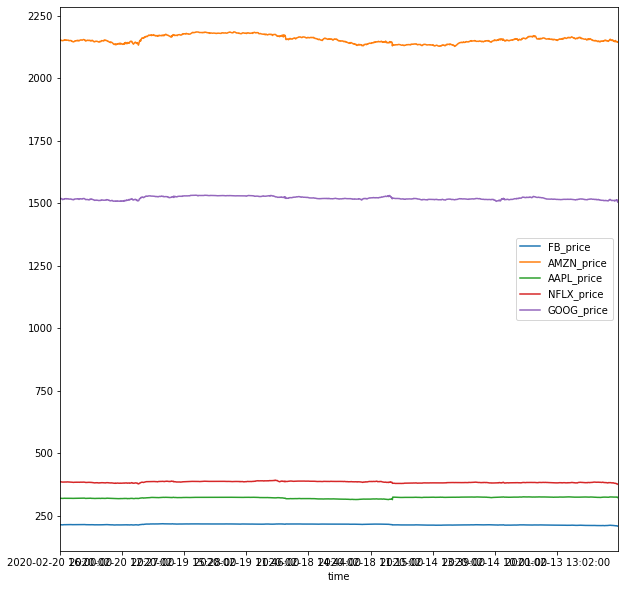

In [148]:
df[[item for item in list(df.columns) if 'price' in item.split('_')]].plot(kind='line',figsize=(10,10))